## The goal: explore coupling metrics between CAM6 and CLM5 from MOAR simulation. 
Author: Meg D. Fowler <br>
Date:   10 Aug 2020 <br><br>

In [16]:
# Import libraries 
import comet as cm 
import numpy as np 
import xarray as xr 
import pickle
import pandas as pd
import datetime 

# Plotting utils 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util


In [2]:
# Print path to comet metrics: 
help(cm)

Help on package comet:

NAME
    comet

PACKAGE CONTENTS
    __main__
    cli
    file_utils
    metrics (package)

DATA
    list_metrics = ['CouplingIndex', 'MixingDiagram', 'HeatCond', 'ConvTri...

VERSION
    1.0.0

FILE
    /Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/comet/__init__.py




## Read in data

In [2]:
# Set directories and file names 
dailyDir   = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/data/day/'
middleName = '_day_CESM2_amip_r10i1p1f1_gn_'
varNames   = ['hfls','hfss','mrso','mrsos','tas','hurs','ps']

# Set time period portion of fileNames 
# timeName_flx  = ['19500101-19591231','19600101-19691231','19700101-19791231','19800101-19891231', 
#                  '19900101-19991231','20000101-20091231','20100101-20150101']
timeName_flx  = ['19700101-19791231','19800101-19891231', 
                 '19900101-19991231','20000101-20091231']

timeName_soil = ['19500101-19991231','20000101-20150101']


In [3]:
# Read in test file to get lat/lon 
fileName = dailyDir+varNames[0]+middleName+timeName_flx[0]+'.nc'
testDF   = xr.open_dataset(fileName, decode_times=True)

# Get lat and lon 
lat = testDF.lat.values
lon = testDF.lon.values 


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'hfls' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [4]:
# Read in surface fluxes along

for iT in range(len(timeName_flx)):

    # --- Compile surface fluxes into singe large arrays in time 

    # Latent heat flux
    lhFile       = dailyDir+varNames[0]+middleName+timeName_flx[iT]+'.nc' # File name
    lhDF         = xr.open_dataset(lhFile,decode_times=True) 
    lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()

    # Sensible heat flux
    shFile       = dailyDir+varNames[1]+middleName+timeName_flx[iT]+'.nc' # File name
    shDF         = xr.open_dataset(shFile,decode_times=True)
    shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

#     # --- Compile surface T and RH into large arrays 

#     # Sfc Temp
#     tFile          = dailyDir+varNames[4]+middleName+timeName_flx[iT]+'.nc' # File name
#     TsfcDF         = xr.open_dataset(tFile,decode_times=True) 
#     TsfcDF['time'] = TsfcDF.indexes['time'].to_datetimeindex()

#     # Sfc RH
#     rhFile       = dailyDir+varNames[5]+middleName+timeName_flx[iT]+'.nc' # File name
#     rhDF         = xr.open_dataset(rhFile,decode_times=True)
#     rhDF['time'] = rhDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

#     # Sfc pressure
#     psFile       = dailyDir+varNames[6]+'_CFday_CESM2_amip_r10i1p1f1_gn_'+timeName_flx[iT]+'.nc' # File name
#     psDF         = xr.open_dataset(psFile,decode_times=True)
#     psDF['time'] = psDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to datetime

    if iT==0:
        lhflx_full = lhDF 
        shflx_full = shDF
#         Tsfc_full  = TsfcDF 
#         RHsfc_full = rhDF
#         Psfc_full  = psDF
    else: 
        lhflx_full = xr.concat([lhflx_full, lhDF], dim="time")
        shflx_full = xr.concat([shflx_full, shDF], dim="time")
#         Tsfc_full  = xr.concat([Tsfc_full,  TsfcDF], dim="time")
#         RHsfc_full = xr.concat([RHsfc_full, rhDF],   dim="time")
#         Psfc_full  = xr.concat([Psfc_full,  psDF],   dim="time")

    print('Done with ', timeName_flx[iT])


<ipython-input-4-46fbe3115d61>:10: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  lhDF['time'] = lhDF.indexes['time'].to_datetimeindex()
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'hfss' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
<ipython-input-4-46fbe3115d61>:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  shDF['time'] = shDF.indexes['time'].to_datetimeindex() # Convert from cf time (non-standard calendar) to date

Done with  19700101-19791231
Done with  19800101-19891231
Done with  19900101-19991231
Done with  20000101-20091231


In [5]:
# Read in soil moisture

for iT in range(len(timeName_soil)):

    # --- Compile soil moisture into singe large arrays in time 

#     # Full column SM 
#     soilFile = dailyDir+varNames[2]+middleName+timeName_soil[iT]+'.nc' # File name
#     soilDF   = xr.open_dataset(soilFile,decode_times=True) 
#     soilDF['time'] = soilDF.indexes['time'].to_datetimeindex()
    
    # 10 cm SM 
    soil10File = dailyDir+varNames[3]+middleName+timeName_soil[iT]+'.nc' # File name
    soil10DF   = xr.open_dataset(soil10File,decode_times=True)
    soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()
    
    if iT==0:
#         soilM_full   = soilDF 
        soilM10_full = soil10DF
    else: 
#         soilM_full   = xr.concat([soilM_full, soilDF], dim="time")
        soilM10_full = xr.concat([soilM10_full, soil10DF], dim="time")

    print('Done with ', timeName_soil[iT])


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'mrsos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
<ipython-input-5-fdd1827c18d8>:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  soil10DF['time'] = soil10DF.indexes['time'].to_datetimeindex()


Done with  19500101-19991231
Done with  20000101-20150101


In [6]:
# Load pressure level of LCL (computed separately in Get_LCLpressure.py and saved as pickle file)
lclPath = '/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/LCL-pressure-HeightAboveGround_1970-2014.p'
Plcl    = pickle.load( open( lclPath, "rb" ) )


Plot average pressure level of the LCL - does this seem reasonable? <br>
Probably; It's of course a much different value over mountains and high terrain, so it's good to see that. Pretty consistent and low in the atmosphere for ocean gridcells. 

Text(0.5, 1.0, 'Pressure Level of LCL (time average)')

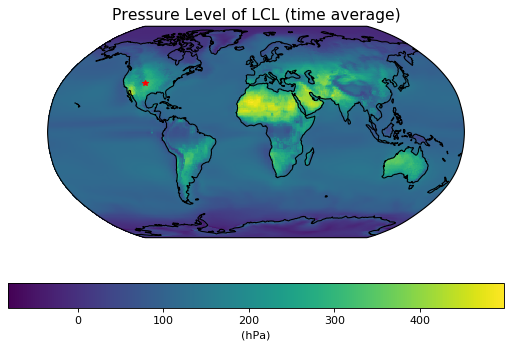

In [9]:
# Map out average pressure level of the LCL (in terms of height above sfc)

fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
Plcl_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(Plcl,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,Plcl_cyclic,transform=ccrs.PlateCarree())
ax.plot(lon_cyclic[206],lat[135],'r*',markersize=5,transform=ccrs.PlateCarree())   # Point for sanity check
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='(hPa)',orientation='horizontal')
ax.set_title('Pressure Level of LCL (time average)', fontsize=14)


In [8]:
print('Interested in point: [%.1f %.1f] in [lon,lat] for sanity checks ' % (lon_cyclic[206],lat[135]))

Interested in point: [257.5 37.2] in [lon,lat] for sanity checks 


To see if I can get things to run, I limited timeframe to 1970-2015. So limit SM and Plcl: 

In [8]:
# Limit time period of soil moisture: 
dates       = pd.DatetimeIndex(soilM10_full['time'].values)
iIncludeSM  = np.where((dates.year>=1979) & (dates.year<=2006))[0]
soilM10_sel = np.asarray(soilM10_full.mrsos.values)[iIncludeSM,:,:]

# Now limit the time period of everything else 
dates     = pd.DatetimeIndex(lhflx_full['time'].values)
iInclude  = np.where((dates.year>=1979) & (dates.year<=2006))[0]
dates     = dates[iInclude]

SHflx_sel = np.asarray(shflx_full.hfss.values)[iInclude,:,:]
lhflx_sel = lhflx_full.isel(time=iInclude)
Plcl_sel  = Plcl[iInclude,:,:]


In [9]:
# Remove bigger arrays from memory (see if we can save some space)
del shflx_full 


(726527.0, 726833.0)

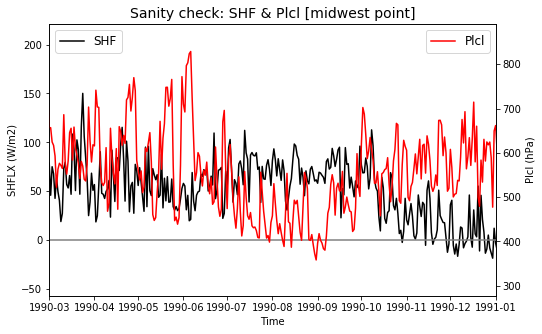

In [13]:
# This is an old plot from when I had Plcl as the actual pressure level of the LCL, not as a hgt above sfc 



# # Plot a timeseries of variables 

# fig, ax1 = plt.subplots(1,1, figsize=(8, 5), facecolor='w', edgecolor='k')

# ax1.plot(dates, shflx_full.hfss[:,135,206],'k-')
# ax1.set_ylabel('SHFLX (W/m2)')
# ax1.set_xlabel('Time')
# ax1.legend(['SHF'],loc='upper left',fontsize=12)
# ax1.set_title('Sanity check: SHF & Plcl [midwest point]', fontsize=14)
# ax1.axhline(0,color='gray')

# ax2 = ax1.twinx()
# ax2.plot(dates, Plcl_sel[:,135,206], 'r-')
# ax2.set_ylabel('Plcl (hPa)')
# ax2.legend(['Plcl'], loc='upper right',fontsize=12)

# ax1.set_xlim([datetime.date(1990,3,1), datetime.date(1991,1,1)])



(726619.0, 726649.0)

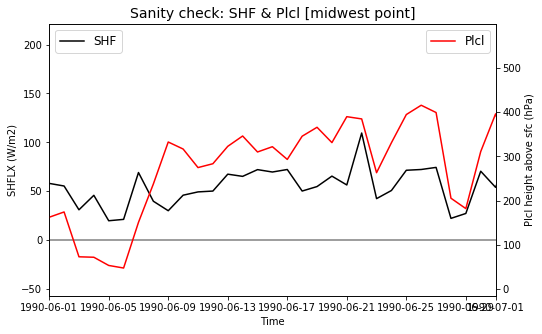

In [12]:
# Plot a timeseries of variables 

fig, ax1 = plt.subplots(1,1, figsize=(8, 5), facecolor='w', edgecolor='k')

ax1.plot(dates, shflx_full.hfss[:,135,206],'k-')
ax1.set_ylabel('SHFLX (W/m2)')
ax1.set_xlabel('Time')
ax1.legend(['SHF'],loc='upper left',fontsize=12)
ax1.set_title('Sanity check: SHF & Plcl [midwest point]', fontsize=14)
ax1.axhline(0,color='gray')

ax2 = ax1.twinx()
ax2.plot(dates, Plcl[:,135,206], 'r-')
ax2.set_ylabel('Plcl height above sfc (hPa)')
ax2.legend(['Plcl'], loc='upper right',fontsize=12)

ax1.set_xlim([datetime.date(1990,6,1), datetime.date(1990,7,1)])


**Quick test to make sure these variables looks reasonable**

Text(0.5, 1.0, 'Pressure Level of LCL - Height above sfc (time average)')

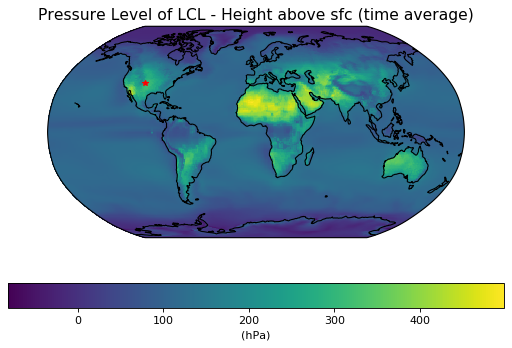

In [16]:
# Map out average pressure level of the LCL

fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
Plcl_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(Plcl_height,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,Plcl_cyclic,transform=ccrs.PlateCarree())
ax.plot(lon_cyclic[206],lat[135],'r*',markersize=5,transform=ccrs.PlateCarree())   # Point for sanity check
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='(hPa)',orientation='horizontal')
ax.set_title('Pressure Level of LCL - Height above sfc (time average)', fontsize=14)


Text(0.5, 1.0, 'LHFLX (time mean, 1950-2014)')

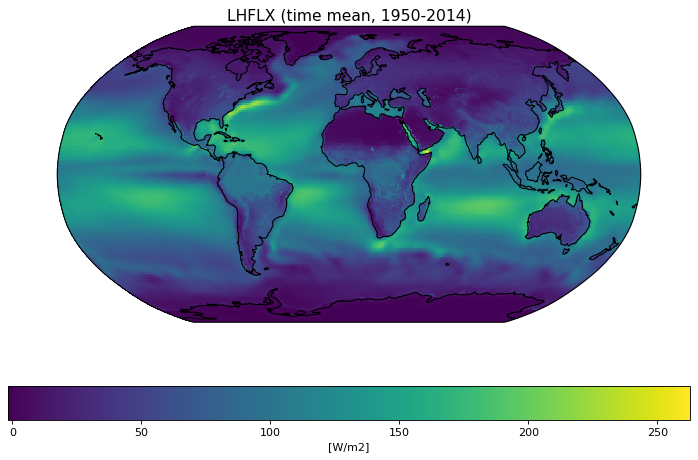

In [7]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
LHavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(lhflx_full.hfls,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,LHavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[W/m2]',orientation='horizontal')
ax.set_title('LHFLX (time mean, 1950-2014)', fontsize=14)


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


Text(0.5, 1.0, '10cm Soil Moisture (time mean, 1950-2014)')

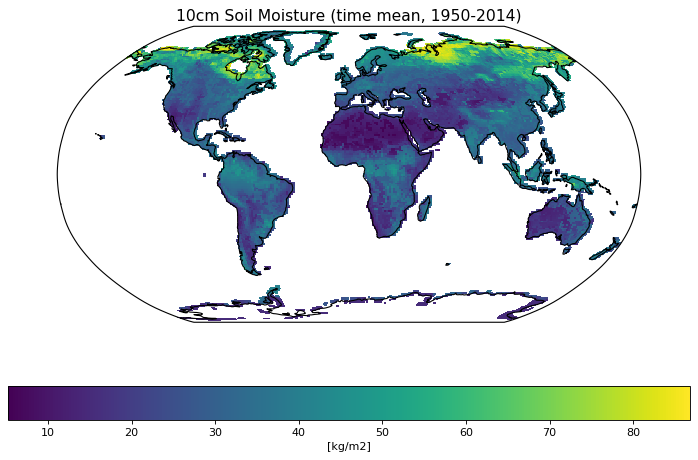

In [56]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
SMavg_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(soilM10_full.mrsos,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,SMavg_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('10cm Soil Moisture (time mean, 1950-2014)', fontsize=14)


/Users/meganfowler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, '10cm Soil Moisture (time mean, 1979-2006)')

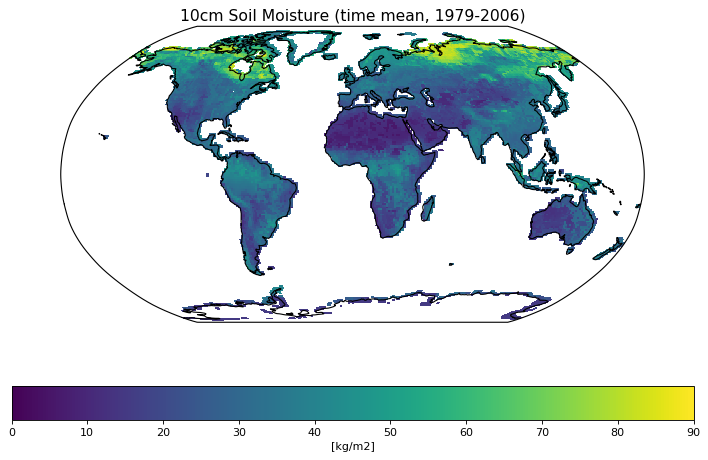

In [11]:
# Plot avg soil moisture for 1979-1981

fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Figure out years of interest 
iTest = np.where((dates.year>=1979) & (dates.year<=2006))[0]
# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
SMavg_cyclic2, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(soilM10_full.mrsos[iTest,:,:],0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,SMavg_cyclic2,
                             vmin = 0,
                             vmax = 90,
                             transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('10cm Soil Moisture (time mean, 1979-2006)', fontsize=14)


Text(0.5, 1.0, 'Surface Temperature (time mean, 1950-2014)')

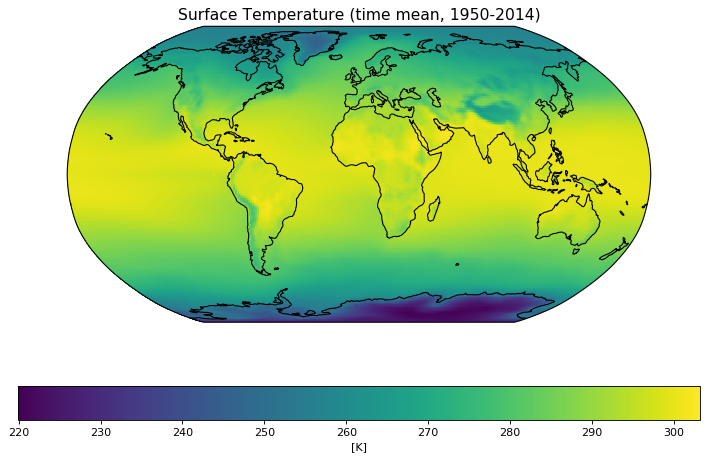

In [8]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
Tsfc_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(np.nanmean(Tsfc_full.tas,0)), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,Tsfc_cyclic,transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[K]',orientation='horizontal')
ax.set_title('Surface Temperature (time mean, 1950-2014)', fontsize=14)


## Coupling metrics

### Terrestrial coupling index

In [ ]:
soilM10_sel

In [15]:
# Combine two variables into single dataset 
#TS = lhflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_full['mrsos'])})
TS = lhflx_sel.assign({'mrsos': (('time','lat','lon'),soilM10_sel)})


In [17]:
terra_coupling = cm.metrics.CouplingIndex()
terra_coupling = terra_coupling.compute(TS, xname='mrsos',yname='hfls',averaging='season')


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [18]:
# Save to netCDF file
terra_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_lhf_vs_soilm_1979-2006.nc')


In [74]:
terra_coupling

<xarray.Dataset>
Dimensions:        (lat: 192, lon: 288, season: 4)
Coordinates:
  * lat            (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon            (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * season         (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    mrsos_hfls_CI  (season, lat, lon) float64 nan nan nan nan ... nan nan nan

Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [DJF]')

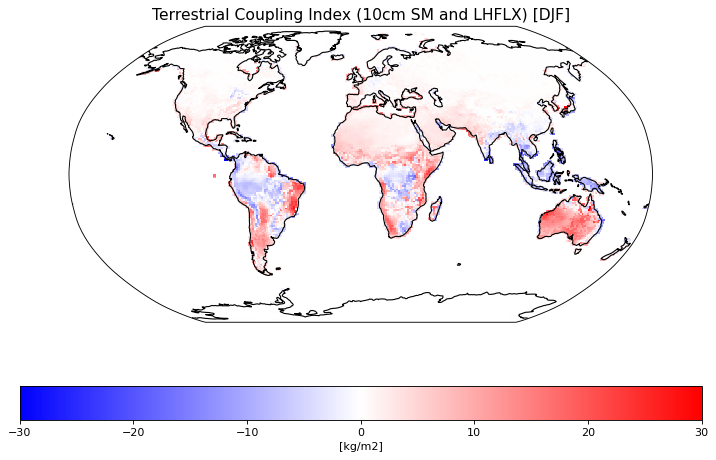

In [19]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_DJF, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[0,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_DJF,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[0]+']', fontsize=14)


Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [JJA]')

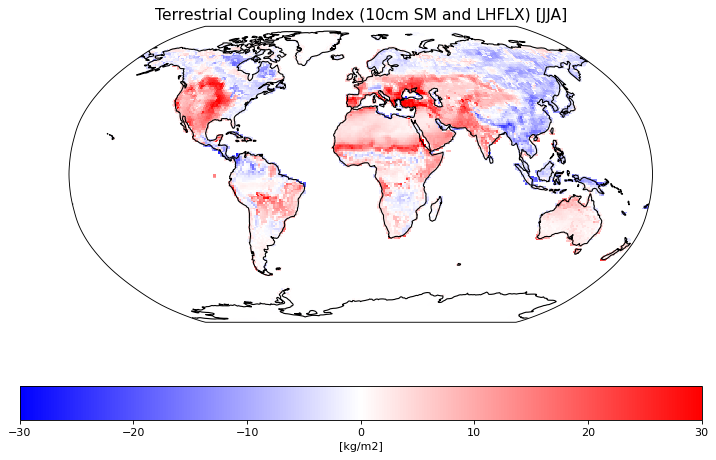

In [20]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_JJA, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[1,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_JJA,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[1]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [MAM]')

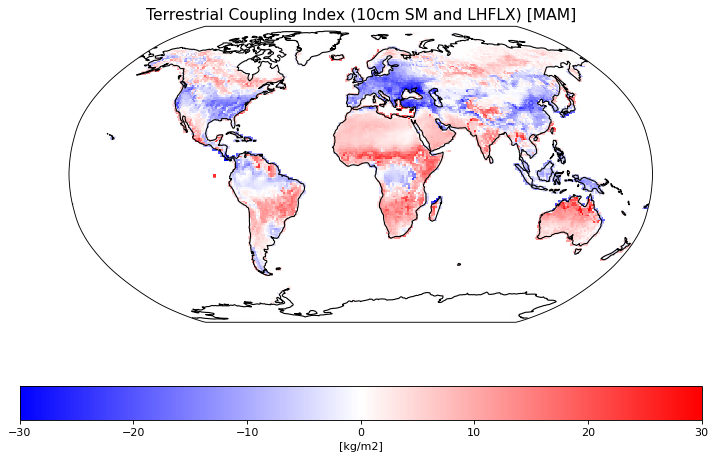

In [21]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_MAM, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[2,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_MAM,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[2]+']', fontsize=14)



Text(0.5, 1.0, 'Terrestrial Coupling Index (10cm SM and LHFLX) [SON]')

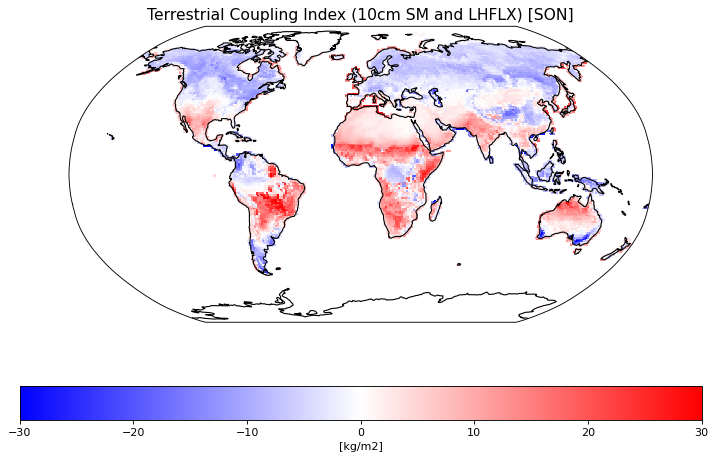

In [22]:
fig=plt.figure(figsize=(11, 7), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.set_global()

# Add cyclic point (where lon goes from 360˚ to 0˚) -- othwerwise, blank line 
terraCoupl_SON, lon_cyclic = cartopy.util.add_cyclic_point(np.squeeze(terra_coupling.mrsos_hfls_CI[3,:,:]), lon)

# Make plot
contour_plot = ax.pcolormesh(lon_cyclic,lat,terraCoupl_SON,vmin=-30,vmax=30,cmap='bwr',transform=ccrs.PlateCarree())
ax.coastlines()
cbar = plt.colorbar(contour_plot, label='[kg/m2]',orientation='horizontal')
ax.set_title('Terrestrial Coupling Index (10cm SM and LHFLX) ['+np.asarray(terra_coupling.season)[3]+']', fontsize=14)


### Atmospheric leg of the coupling index
Following the path outlined in Dirmeyer et al. (2014), we can use RH and T to get the dewpoint temperature, which can then be used along with PS and T to get the pressure level of the LCL. The authors note that this is highly correlated with the height of the boundary layer. The coupling between that pressure level and the sensible heat flux (and SM with SHFLX) can give an idea of the full L-A coupling in a region.<br><br>
The dew point is computed following the Magnus formula, as outlined in Eq (3)- Eq (8) of Lawrence et al. (2005; BAMS). 
<br><br>
<b>Note:</b> When attempting to carry out above steps in Jupyter Notebook, kernal kept dying when ~85% of the way through computing Plcl. So moved to separate python script: Get_LCLpressure.py. <br>

In [10]:
# Make one big xr.Dataset containing all the information we need  
dFull = lhflx_sel
dFull['mrsos'] = (('time','lat','lon'), soilM10_sel)
dFull['Plcl']  = (('time','lat','lon'), Plcl_sel)
dFull['hfss']  = (('time','lat','lon'), SHflx_sel)


In [25]:
# --- Compute coupling index between soil moisture and sensible heat flux (terrestrial leg) --- # 

# Combine variables into single dataset 
# dH_dW   = shflx_full.assign({'mrsos': (('time','lat','lon'), soilM10_sel['mrsos'])})  # SM & SHFLX

# Compute coupling index 
terraLeg_coupling = cm.metrics.CouplingIndex()
terraLeg_coupling = terraLeg_coupling.compute(dFull, xname='mrsos',yname='hfss',averaging='season')

# Save to netCDF file
terraLeg_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_shf_vs_soilm_1979-2006.nc')


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [11]:
# --- Compute coupling index between sensible heat flux and pressure level of LCL (atmospheric leg) --- #

# Combine variables into single dataset 
#dLCL_dH = shflx_full.assign({'Plcl': (('time','lat','lon'), Plcl_sel)})                    # P_LCL & SHFLX

# Compute coupling index 
atmoLeg_coupling = cm.metrics.CouplingIndex()
atmoLeg_coupling = atmoLeg_coupling.compute(dFull, xname='hfss',yname='Plcl',averaging='season')

# Save to netCDF file 
atmoLeg_coupling.to_netcdf('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/AtmoLeg_coupling_Plcl_vs_shf_1979-2006.nc')


/Users/meganfowler/opt/anaconda3/envs/newBase/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


### Basing off of netCDF files: 

In [12]:
# Open nc files into xr datasets 
atmoLeg_coupling  = xr.open_dataset('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/AtmoLeg_coupling_Plcl_vs_shf_1979-2006.nc', decode_times=False)
terraLeg_coupling = xr.open_dataset('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_shf_vs_soilm_1979-2006.nc', decode_times=False)
terraLH_coupling  = xr.open_dataset('/Users/meganfowler/Documents/NCAR/Analysis/Coupling_initial/Coupling_CAM6CLM5/processed_data/TerraLeg_coupling_lhf_vs_soilm_1979-2006.nc', decode_times=False)


## Make analysis plots

In [13]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    
    import matplotlib as mpl
    import numpy as np
    
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

### Create a list of RGB tuples
colorsList_SMvLHF = [(127,58,144), 
                     (67,81,163),
                     (0,191,243),
                     (194,229,220),
                     (124,194,66),
                     (227,219,46),
                     (250,175,44),
                     (245,127,36), 
                     (239,67,54),
                     (238,45,122),
                     (162,6,66)] # This example uses the 8-bit RGB

#colors = [(15,19,135), (9,61,240), (35,93,209), (43,156,222),(90,193,253), 
#           (221,238,247), (246,246,22),(246,186,22),(246,126,22), (246,67,22),(255,24,16)] # This example uses the 8-bit RGB
my_cmap_SMvLHF = make_cmap(colorsList_SMvLHF, bit=True)



In [14]:
# --- Define array of colors for maps --- #

# Isolate seasonal arrays (seasons go: DJF,JJA,MAM,SON)
LHcoupl_JJA = np.squeeze(np.asarray(terraLH_coupling.mrsos_hfls_CI[1,:,:]))
LHcoupl_DJF = np.squeeze(np.asarray(terraLH_coupling.mrsos_hfls_CI[0,:,:]))

# Make cyclic first 
LHcoupl_JJA_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(LHcoupl_JJA, lon)
LHcoupl_DJF_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(LHcoupl_DJF, lon)

# Now get color coded arrays 
colorsSMvLHF_JJA = np.full([len(lat),len(lon)+1],np.nan)
colorsSMvLHF_DJF = np.full([len(lat),len(lon)+1],np.nan)

# JJA 
colorsSMvLHF_JJA[np.where(LHcoupl_JJA_cyclic<-15)]                                = 1
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>-15) & (LHcoupl_JJA_cyclic<=-10))]  = 2
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>-10) & (LHcoupl_JJA_cyclic<=-5))]   = 3
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>-5)  & (LHcoupl_JJA_cyclic<=5))]    = 4
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>5)   & (LHcoupl_JJA_cyclic<=10))]   = 5
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>10)  & (LHcoupl_JJA_cyclic<=15))]   = 6
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>15)  & (LHcoupl_JJA_cyclic<=20))]   = 7
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>20)  & (LHcoupl_JJA_cyclic<=25))]   = 8
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>25)  & (LHcoupl_JJA_cyclic<=30))]   = 9
colorsSMvLHF_JJA[np.where((LHcoupl_JJA_cyclic>30)  & (LHcoupl_JJA_cyclic<=35))]   = 10
colorsSMvLHF_JJA[np.where(LHcoupl_JJA_cyclic>35)]                                 = 11

# DJF 
colorsSMvLHF_DJF[np.where(LHcoupl_DJF_cyclic<-15)]                                = 1
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>-15) & (LHcoupl_DJF_cyclic<=-10))]  = 2
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>-10) & (LHcoupl_DJF_cyclic<=-5))]   = 3
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>-5)  & (LHcoupl_DJF_cyclic<=5))]    = 4
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>5)   & (LHcoupl_DJF_cyclic<=10))]   = 5
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>10)  & (LHcoupl_DJF_cyclic<=15))]   = 6
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>15)  & (LHcoupl_DJF_cyclic<=20))]   = 7
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>20)  & (LHcoupl_DJF_cyclic<=25))]   = 8
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>25)  & (LHcoupl_DJF_cyclic<=30))]   = 9
colorsSMvLHF_DJF[np.where((LHcoupl_DJF_cyclic>30)  & (LHcoupl_DJF_cyclic<=35))]   = 10
colorsSMvLHF_DJF[np.where(LHcoupl_DJF_cyclic>35)]                                 = 11


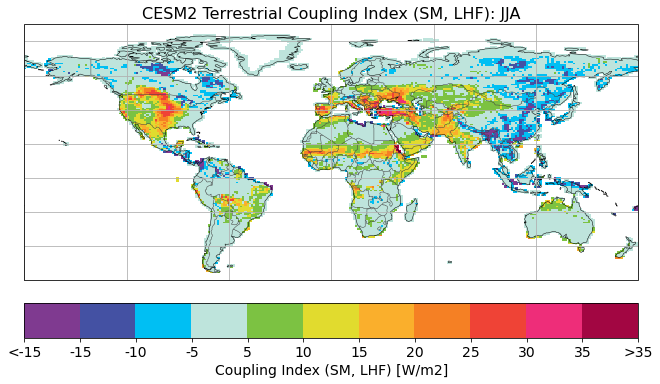

In [17]:
# --- Plot JJA SM,LHF coupling index

fig=plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')

my_fontsize = 14

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())   #Set to global ot match previous version
bounds = [1,2,3,4,5,6,7,8,9,10,11,12]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

## --- Create Plot ---
contour_plot = ax.pcolormesh(lon_cyclic,lat,colorsSMvLHF_JJA,norm=norm,
                             cmap=my_cmap_SMvLHF,
                             vmin=1,vmax=12)

# Colorbar
ax_position = ax.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SM, LHF) [W/m2]',fontsize=my_fontsize)
cbar.ax.set_xticklabels(['<-15','-15','-10','-5','5','10', '15','20','25','30','35','>35'],fontsize=my_fontsize)  # vertically oriented colorbar

#Additional options 
ax.set_title('CESM2 Terrestrial Coupling Index (SM, LHF): JJA',fontsize=16)
ax.coastlines(linewidth=0.5,edgecolor='0.25')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


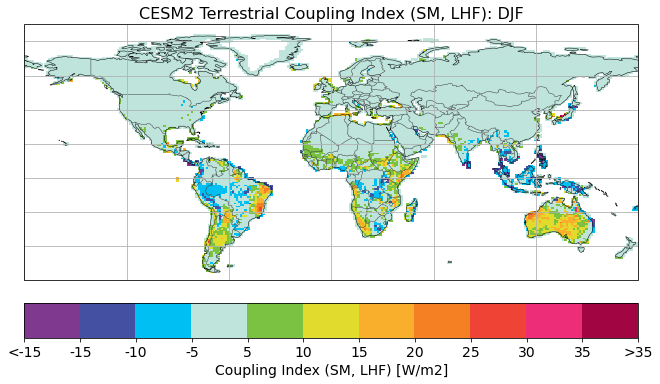

In [18]:
# --- Plot DJF SM,LHF coupling index

fig=plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')

my_fontsize = 14

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
#ax.set_global()
ax.set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())   #Set to global ot match previous version

bounds = [1,2,3,4,5,6,7,8,9,10,11,12]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

## --- Create Plot ---
contour_plot = ax.pcolormesh(lon_cyclic,lat,colorsSMvLHF_DJF,norm=norm,
                             cmap=my_cmap_SMvLHF,
                             vmin=1,vmax=12)

# Colorbar
ax_position = ax.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SM, LHF) [W/m2]',fontsize=my_fontsize)
cbar.ax.set_xticklabels(['<-15','-15','-10','-5','5','10', '15','20','25','30','35','>35'],fontsize=my_fontsize)  # vertically oriented colorbar

#Additional options 
ax.set_title('CESM2 Terrestrial Coupling Index (SM, LHF): DJF',fontsize=16)
ax.coastlines(linewidth=0.5,edgecolor='0.25')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


**Now plots for SHFLX coupling**

In [19]:
### Create a list of RGB tuples for terrestrial leg (SM, SHFLX)
colorsList_SMvSHF = [(124,135,181), 
                     (107,109,161),
                     (51,82,120),
                     (49,114,127),
                     (97,181,89),
                     (200,218,102),
                     (255,242,116),
                     (238,164,58)] # This example uses the 8-bit RGB

my_cmap_SMvSHF = make_cmap(colorsList_SMvSHF, bit=True)


### Create a list of RGB tuples for atmospheric leg (SHFLX, P_lcl)
colorsList_SHFvPlcl = [(172,183,209), 
                     (124,135,181),
                     (51,82,120),
                     (97,181,89),
                     (200,218,102),
                     (255,242,116),
                     (238,164,58),
                     (136,90,59),
                     (214,48,44),
                     (224,93,126),
                     (242,189,177)] # This example uses the 8-bit RGB

my_cmap_SHFvPlcl = make_cmap(colorsList_SHFvPlcl, bit=True)


In [20]:
# --- Define array of colors for maps --- #

# Isolate seasonal arrays (seasons go: DJF,JJA,MAM,SON)
AtmoLeg_JJA  = np.squeeze(np.asarray(atmoLeg_coupling.hfss_Plcl_CI[1,:,:]))
TerraLeg_JJA = np.squeeze(np.asarray(terraLeg_coupling.mrsos_hfss_CI[1,:,:]))

# Make cyclic first 
AtmoLeg_JJA_cyclic, lon_cyclic  = cartopy.util.add_cyclic_point(AtmoLeg_JJA, lon)
TerraLeg_JJA_cyclic, lon_cyclic = cartopy.util.add_cyclic_point(TerraLeg_JJA, lon)

# Now get color coded arrays 
colorsAtmoLeg  = np.full([len(lat),len(lon)+1],np.nan)
colorsTerraLeg = np.full([len(lat),len(lon)+1],np.nan)

# Atmo leg 
colorsAtmoLeg[np.where(AtmoLeg_JJA_cyclic<-150)]                                 = 1
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>-150) & (AtmoLeg_JJA_cyclic<=-100))]  = 2
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>-100) & (AtmoLeg_JJA_cyclic<=-50))]   = 3
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>-50)  & (AtmoLeg_JJA_cyclic<=-20))]   = 4
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>-20)  & (AtmoLeg_JJA_cyclic<=0))]     = 5
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>0)    & (AtmoLeg_JJA_cyclic<=20))]    = 6
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>20)   & (AtmoLeg_JJA_cyclic<=40))]    = 7
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>40)   & (AtmoLeg_JJA_cyclic<=60))]    = 8
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>60)   & (AtmoLeg_JJA_cyclic<=80))]    = 9
colorsAtmoLeg[np.where((AtmoLeg_JJA_cyclic>80)   & (AtmoLeg_JJA_cyclic<=100))]   = 10
colorsAtmoLeg[np.where(AtmoLeg_JJA_cyclic>100)]                                  = 11


# Terra leg  
colorsTerraLeg[np.where(TerraLeg_JJA_cyclic<-20)]                                 = 1
colorsTerraLeg[np.where((TerraLeg_JJA_cyclic>-20) & (TerraLeg_JJA_cyclic<=-15))]  = 2
colorsTerraLeg[np.where((TerraLeg_JJA_cyclic>-15) & (TerraLeg_JJA_cyclic<=-10))]  = 3
colorsTerraLeg[np.where((TerraLeg_JJA_cyclic>-10) & (TerraLeg_JJA_cyclic<=-5))]   = 4
colorsTerraLeg[np.where((TerraLeg_JJA_cyclic>-5) & (TerraLeg_JJA_cyclic<=-2))]    = 5
colorsTerraLeg[np.where((TerraLeg_JJA_cyclic>-2) & (TerraLeg_JJA_cyclic<=-1))]    = 6
colorsTerraLeg[np.where((TerraLeg_JJA_cyclic>-1) & (TerraLeg_JJA_cyclic<=0))]     = 7
colorsTerraLeg[np.where(TerraLeg_JJA_cyclic>0)]                                   = 8


In [21]:
# -- Make land mask to ignore anything that's not over land -- # 
lndMask = np.full([len(lat),len(lon)+1],np.nan)
lndMask[np.where(np.isfinite(TerraLeg_JJA_cyclic))] = 1


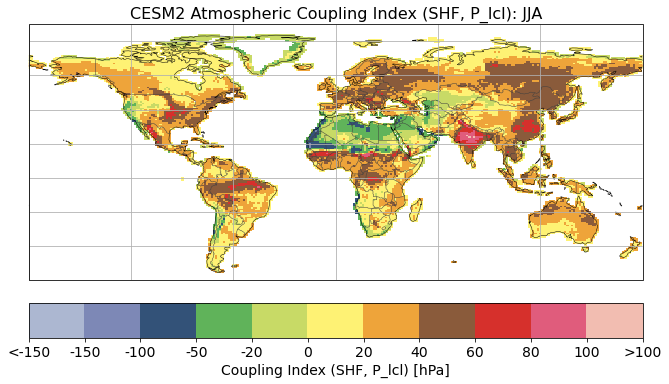

In [22]:
# --- Plot JJA Atmopsheric leg 

fig=plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')

my_fontsize = 14

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())   #Set to global ot match previous version
bounds = [1,2,3,4,5,6,7,8,9,10,11,12]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

## --- Create Plot ---
contour_plot = ax.pcolormesh(lon_cyclic,lat,colorsAtmoLeg*lndMask,norm=norm,
                             cmap=my_cmap_SHFvPlcl,
                             vmin=1,vmax=12)

# Colorbar
ax_position = ax.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SHF, P_lcl) [hPa]',fontsize=my_fontsize)
cbar.ax.set_xticklabels(['<-150','-150','-100','-50','-20','0','20','40','60','80','100','>100'],fontsize=my_fontsize)  # vertically oriented colorbar

#Additional options 
ax.set_title('CESM2 Atmospheric Coupling Index (SHF, P_lcl): JJA',fontsize=16)
ax.coastlines(linewidth=0.5,edgecolor='0.25')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')


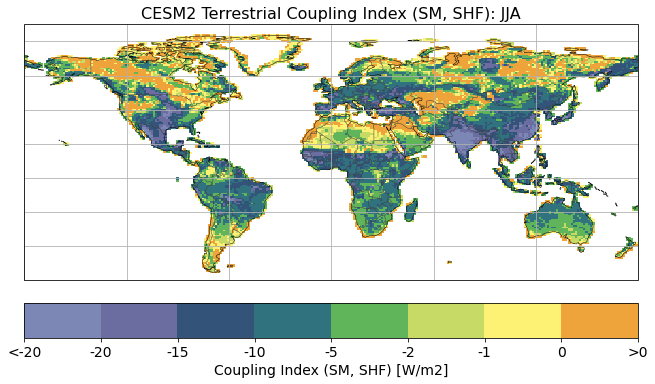

In [23]:
# --- Plot JJA Terrestrial leg 

fig=plt.figure(figsize=(11, 8), facecolor='w', edgecolor='k')

my_fontsize = 14

## --- Set axes and color sections --- 
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([-180,180,-60,90], crs=ccrs.PlateCarree())   #Set to global ot match previous version
bounds = [1,2,3,4,5,6,7,8,9]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

## --- Create Plot ---
contour_plot = ax.pcolormesh(lon_cyclic,lat,colorsTerraLeg,norm=norm,
                             cmap=my_cmap_SMvSHF,
                             vmin=1,vmax=9)

# Colorbar
ax_position = ax.get_position()
cbar_ax = fig.add_axes([ax_position.x0, ax_position.y0-0.1, ax_position.width, 0.06])
cbar = plt.colorbar(contour_plot, orientation='horizontal',ticks=range(13),cax=cbar_ax)
cbar.set_label('Coupling Index (SM, SHF) [W/m2]',fontsize=my_fontsize)
cbar.ax.set_xticklabels(['<-20','-20','-15','-10','-5','-2','-1','0','>0'],fontsize=my_fontsize)  # vertically oriented colorbar

#Additional options 
ax.set_title('CESM2 Terrestrial Coupling Index (SM, SHF): JJA',fontsize=16)
ax.coastlines(linewidth=0.5,edgecolor='0.25')
ax.gridlines()
ax.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
